### Anomaly Detection(Network Intrusion Detection) KDDCUP99, using SVM and Decision Tree with PCA

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import svm
from time import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

### 输出python和package的版本

In [3]:
import platform 
print("platform  version: {}".format(platform .__version__))
print("python version: {}".format(platform.python_version()))
import csv
print("csv version: {}".format(csv.__version__))
import numpy as np
print("numpy version: {}".format(np.__version__))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))

platform  version: 1.0.8
python version: 3.9.7
csv version: 1.0
numpy version: 1.22.4
pandas version: 1.5.2
scikit-learn version: 1.3.0
matplotlib version: 3.4.3
IPython version: 7.29.0


In [4]:
fr = pd.read_csv("kddcup.data.txt", encoding='utf-8',error_bad_lines=False)
data = np.array(fr)

Skipping line 4817100: expected 42 fields, saw 56



In [5]:
# Attacking methods Counts

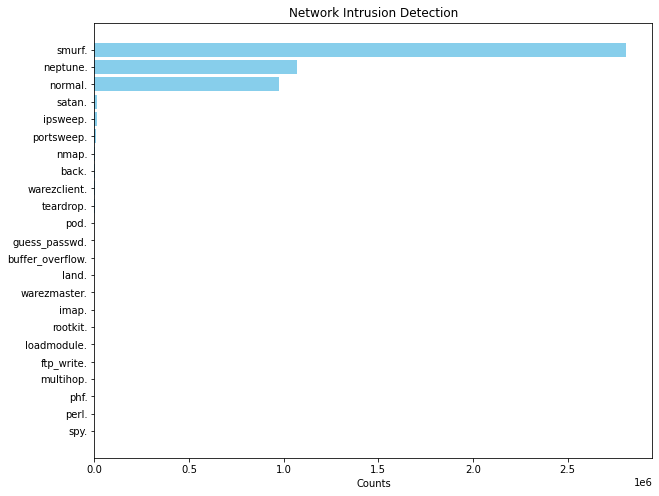

In [6]:
from collections import Counter
attacking_methods = Counter(data[:,-1])
# 将Counter对象转换为列表，并按照值从高到低排序
items = attacking_methods.most_common()
labels, values = zip(*items)

# 绘制条形图
plt.figure(figsize=(10, 8))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Counts')
plt.title('Network Intrusion Detection')
plt.gca().invert_yaxis()  # 反转y轴，使得最高的条形图在上方
plt.show()

In [7]:
Counter(data[:,-1]).most_common()

[('smurf.', 2807886),
 ('neptune.', 1072017),
 ('normal.', 972779),
 ('satan.', 15892),
 ('ipsweep.', 12481),
 ('portsweep.', 10413),
 ('nmap.', 2316),
 ('back.', 2203),
 ('warezclient.', 1020),
 ('teardrop.', 979),
 ('pod.', 264),
 ('guess_passwd.', 53),
 ('buffer_overflow.', 30),
 ('land.', 21),
 ('warezmaster.', 20),
 ('imap.', 12),
 ('rootkit.', 10),
 ('loadmodule.', 9),
 ('ftp_write.', 8),
 ('multihop.', 7),
 ('phf.', 4),
 ('perl.', 3),
 ('spy.', 2)]

In [8]:
encoder = LabelEncoder()
encoder.fit_transform(data[:,-1])
ground_labels=print(encoder.classes_)

['back.' 'buffer_overflow.' 'ftp_write.' 'guess_passwd.' 'imap.'
 'ipsweep.' 'land.' 'loadmodule.' 'multihop.' 'neptune.' 'nmap.' 'normal.'
 'perl.' 'phf.' 'pod.' 'portsweep.' 'rootkit.' 'satan.' 'smurf.' 'spy.'
 'teardrop.' 'warezclient.' 'warezmaster.']


### 读取、处理数据集

In [51]:
data = np.array(fr)
data_labels = LabelEncoder().fit_transform(data[:,-1]) # Encode the labels
data_features = OrdinalEncoder().fit_transform(data[:,0:-1]) # Encode the features
data_features = MinMaxScaler().fit_transform(data_features)                  # Normalizing features

print('Dataset size:',data_features.shape)

Dataset size: (4898429, 41)


### 划分训练集和测试集

In [52]:
data_label = []
for i in data_labels: 
    data_label.append(int(float(i)))
data_label =  np.array(data_label, dtype = int)       # list转换数组
train_feature, test_feature, train_label, test_label = train_test_split(data_features, data_labels,test_size=0.4,random_state=4)# 测试集40%
print('Training set size:{}，Training label size:{}'.format(train_feature.shape, train_label.shape))
print('Test set size:{},Test set label size：{}'.format(test_feature.shape, test_label.shape))

Training set size:(2939057, 41)，Training label size:(2939057,)
Test set size:(1959372, 41),Test set label size：(1959372,)


### Model Training

#### Method 1: decision tree

In [11]:
begin_time = time()                     # 训练预测开始时间
if __name__ == '__main__':
    print('Start training DT：',end='')
    dt = sklearn.tree.DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=20, min_samples_split=2, min_samples_leaf =1)
    dt.fit(train_feature, train_label)
    print(dt)
    print('Training done！')

    print('Start prediction DT：')
    test_predict = dt.predict(test_feature)
    print('Prediction done！')
end_time = time()                        # 训练预测结束时间
total_time = end_time - begin_time
print('Training time',total_time,'s')

Start training DT：DecisionTreeClassifier(max_depth=20)
Training done！
Start prediction DT：
Prediction done！
Training time 51.38025164604187 s


In [12]:
print('Accuracy:', metrics.accuracy_score(test_label, test_predict))
print('Precision:',metrics.precision_score(test_label,test_predict,average='weighted'))
print('Macro F1-score:',metrics.f1_score(test_label,test_predict,average='macro'))

Accuracy: 0.9998882294939399
Precision: 0.9998814898498857
Macro F1-score: 0.6578170681386534


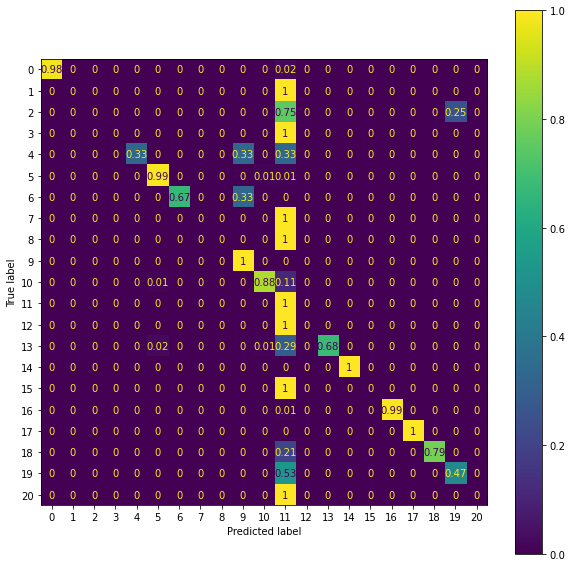

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 计算混淆矩阵
dt_cm = confusion_matrix(test_label, test_predict, normalize='true')
dt_cm = np.round(dt_cm, 2)

# 创建一个图形和轴对象，设置大小
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制混淆矩阵
ConfusionMatrixDisplay(confusion_matrix=dt_cm).plot(ax=ax)
plt.savefig('dt_cm.png')
# 显示图表
plt.show()


#### Method 2:SVM

In [19]:
begin_time = time()
if __name__ == '__main__':
    print('Start training SVM：',end='')
    svm = sklearn.svm.SVC(kernel='rbf', C=1.0, gamma=1.5, tol=1e-2)
    svm.fit(train_feature, train_label)
    print(svm)
    print('Training done！')

    print('Start prediction SVM：')
    test_predict = svm.predict(test_feature)
    print('Prediction done！')

end_time = time()
total_time = end_time - begin_time
print('Training time:',total_time,'s')
end_time = time()
total_time = end_time - begin_time
print('Training time:',total_time,'s')

Training time: 2520.6862325668335 s


In [15]:
print('Accuracy:', metrics.accuracy_score(test_label, test_predict))
print('Precision:',metrics.precision_score(test_label,test_predict,average='weighted'))
print('Training time:',metrics.f1_score(test_label,test_predict,average='macro'))

Accuracy: 0.9998468897177258
Precision: 0.999839207347769
Training time: 0.6921090472225513


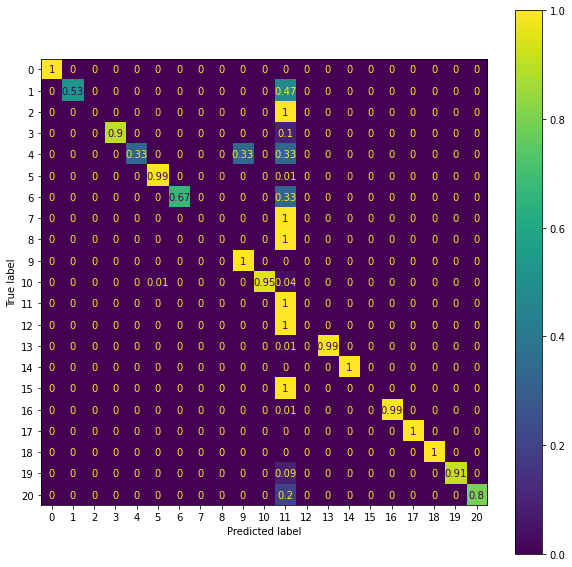

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 计算混淆矩阵
svm_cm = confusion_matrix(test_label, test_predict, normalize='true')
svm_cm = np.round(svm_cm, 2)

# 创建一个图形和轴对象，设置大小
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制混淆矩阵
ConfusionMatrixDisplay(confusion_matrix=svm_cm).plot(ax=ax)

# 显示图表
plt.show()

### Method 3: KNN

In [54]:
begin_time = time()
from sklearn.neighbors import KNeighborsClassifier
# 创建KNN分类器实例
knn = KNeighborsClassifier(n_neighbors=3)

# 使用训练数据训练模型
knn.fit(train_feature, train_label)

# 使用模型对测试数据进行预测
test_predict = knn.predict(test_feature)
end_time = time()
total_time = end_time - begin_time
print('Training time',total_time,'s')

Training time 5356.798692941666 s


In [57]:
print('Accuracy:', metrics.accuracy_score(test_label, test_predict))
print('Precision:',metrics.precision_score(test_label,test_predict,average='weighted'))
print('Macro F1-score:',metrics.f1_score(test_label,test_predict,average='macro'))

Accuracy: 0.9998969057432687
Precision: 0.9998899250051188
Macro F1-score: 0.6945871749356263


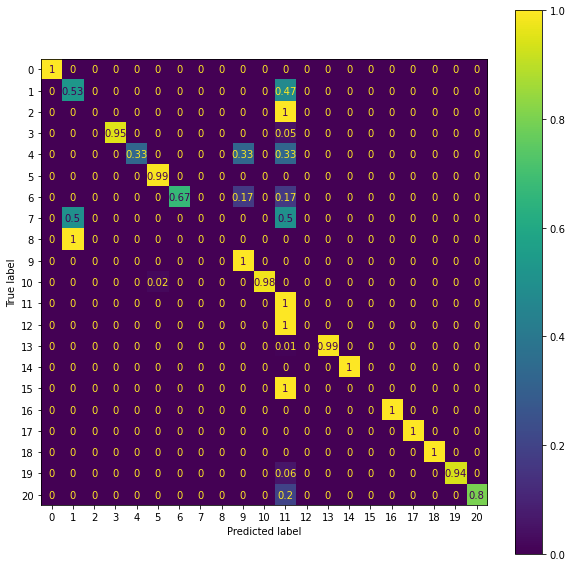

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 计算混淆矩阵
knn_cm = confusion_matrix(test_label, test_predict, normalize='true')
knn_cm = np.round(knn_cm, 2)

# 创建一个图形和轴对象，设置大小
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制混淆矩阵
ConfusionMatrixDisplay(confusion_matrix=knn_cm).plot(ax=ax)
plt.savefig('knn_cm.png')
# 显示图表
plt.show()

### PCA

In [59]:
from sklearn.decomposition import PCA
pca_data_features = PCA(n_components=0.98).fit_transform(data_features)

In [60]:
pca_data_features.shape

(4898429, 8)

In [61]:
data_label = []
for i in data_labels:
    data_label.append(int(float(i)))
data_label =  np.array(data_label, dtype = int)       # list转换数组
train_feature, test_feature, train_label, test_label = train_test_split(pca_data_features, data_labels,test_size=0.4,random_state=4)# 测试集40%
print('Training set size:{}，Training label size:{}'.format(train_feature.shape, train_label.shape))
print('Test set size:{},Test set label size：{}'.format(test_feature.shape, test_label.shape))

Training set size:(2939057, 8)，Training label size:(2939057,)
Test set size:(1959372, 8),Test set label size：(1959372,)


### Decision tree+PCA

In [33]:
begin_time = time()                     # 训练预测开始时间
if __name__ == '__main__':
    print('Start training DT：',end='')
    dt = sklearn.tree.DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=20, min_samples_split=2, min_samples_leaf =1)
    dt.fit(train_feature, train_label)
    print(dt)
    print('Training done！')

    print('Start prediction DT：')
    test_predict = dt.predict(test_feature)
    print('Prediction done！')
end_time = time()                        # 训练预测结束时间
total_time = end_time - begin_time
print('Training time',total_time,'s')

Start training DT：DecisionTreeClassifier(max_depth=20)
Training done！
Start prediction DT：
Prediction done！
Training time 39.03563117980957 s


In [34]:
print('Accuracy:', metrics.accuracy_score(test_label, test_predict))
print('Precision:',metrics.precision_score(test_label,test_predict,average='weighted'))
print('Macro F1-score:',metrics.f1_score(test_label,test_predict,average='macro'))

Accuracy: 0.999650908556415
Precision: 0.9996447858697478
Macro F1-score: 0.5991909995422289


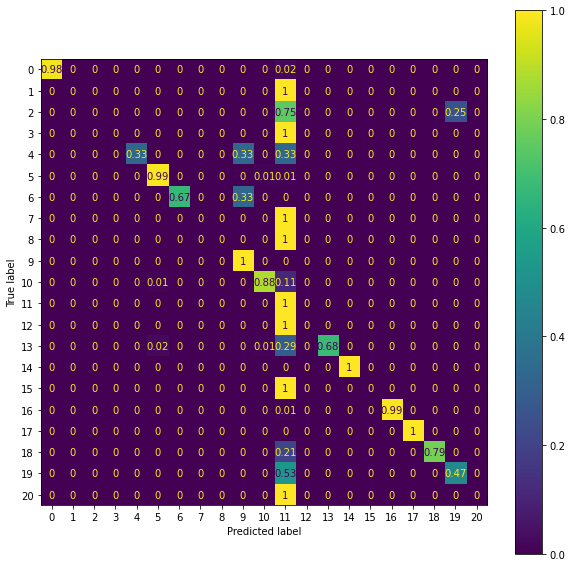

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 计算混淆矩阵
pca_dt_cm = confusion_matrix(test_label, test_predict, normalize='true')
pca_dt_cm = np.round(pca_dt_cm, 2)

# 创建一个图形和轴对象，设置大小
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制混淆矩阵
ConfusionMatrixDisplay(confusion_matrix=pca_dt_cm).plot(ax=ax)
plt.savefig('pca_dt_cm.png')
# 显示图表
plt.show()

### PCA+SVM

In [36]:
begin_time = time()
if __name__ == '__main__':
    print('Start training SVM：', end='')
    svm = sklearn.svm.SVC(kernel='rbf', C=1.0, gamma=1.5, tol=1e-2)
    svm.fit(train_feature, train_label)
    print(svm)
    print('Training done！')

    print('Start prediction SVM：')
    test_predict = svm.predict(test_feature)
    print('Prediction done！')

end_time = time()
total_time = end_time - begin_time
print('Training time:', total_time, 's')


Start training SVM：SVC(gamma=1.5, tol=0.01)
Training done！
Start prediction SVM：
Prediction done！
Training time: 1374.2450053691864 s


In [37]:
end_time = time()
total_time = end_time - begin_time
print('Training time:', total_time, 's')

Training time: 1374.2500066757202 s


In [38]:
print('Accuracy:', metrics.accuracy_score(test_label, test_predict))
print('Precision:',metrics.precision_score(test_label,test_predict,average='weighted'))
print('Macro F1-score:',metrics.f1_score(test_label,test_predict,average='macro'))

Accuracy: 0.9995692497392021
Precision: 0.9995265075963347
Macro F1-score: 0.5397309696062254


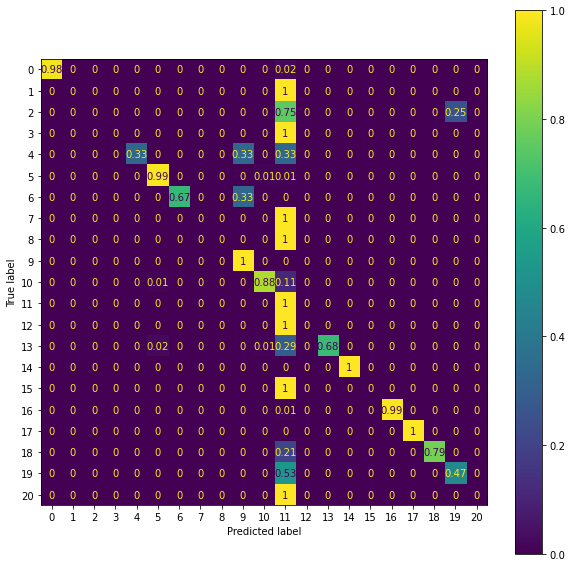

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 计算混淆矩阵
pca_svm_cm = confusion_matrix(test_label, test_predict, normalize='true')
pca_svm_cm = np.round(pca_svm_cm, 2)

# 创建一个图形和轴对象，设置大小
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制混淆矩阵
ConfusionMatrixDisplay(confusion_matrix=pca_svm_cm).plot(ax=ax)
plt.savefig("pca_svm_cm.png")
# 显示图表
plt.show()

### PCA+KNN

In [ ]:
begin_time = time()
from sklearn.neighbors import KNeighborsClassifier
# 创建KNN分类器实例
knn = KNeighborsClassifier(n_neighbors=3)

# 使用训练数据训练模型
knn.fit(train_feature, train_label)

# 使用模型对测试数据进行预测
test_predict = knn.predict(test_feature)
end_time = time()
total_time = end_time - begin_time
print('Training time',total_time,'s')

In [ ]:
total_time

In [ ]:
print('Accuracy:', metrics.accuracy_score(test_label, test_predict))
print('Precision:',metrics.precision_score(test_label,test_predict,average='weighted'))
print('Macro F1-score:',metrics.f1_score(test_label,test_predict,average='macro'))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 计算混淆矩阵
pca_knn_cm = confusion_matrix(test_label, test_predict, normalize='true')
pca_knn_cm = np.round(pca_knn_cm, 2)

# 创建一个图形和轴对象，设置大小
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制混淆矩阵
ConfusionMatrixDisplay(confusion_matrix=pca_knn_cm).plot(ax=ax)
plt.savefig('pca_knn_cm.png')
# 显示图表
plt.show()